# Overview

In this notebook, I will compare predictions on the 2021 season from my final model against historical odds. Data for the historical odds was gathered from [Sportsbook Reviews Online](https://www.sportsbookreviewsonline.com/scoresoddsarchives/nhl/nhloddsarchives.htm). Per their website: Data is sourced from various online sportsbooks including 5dimes, BetOnline, Bookmaker, Heritage, Pinnacle Sports, Sportsbook.com as well as the Westgate Superbook in Las Vegas.

I will look at 2 simple betting strategies to determine profitability:

1. Bet 100 on every game where either the home or away team winning probability from my model is higher than the implied odds  
2. Bet to win 100 on every game where either the home or away team winning probability from my model is higher than the implied odds

In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

In [325]:
odds = pd.read_excel('data/nhl odds 2021.xlsx')

In [326]:
odds.head()

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,PuckLine,Unnamed: 11,OpenOU,Unnamed: 13,CloseOU,Unnamed: 15
0,113,41,V,Pittsburgh,1,1,1,3,-110,-115,1.5,-310,6.0,-110,6.0,105
1,113,42,H,Philadelphia,2,1,3,6,100,-105,-1.5,260,6.0,-110,6.0,-125
2,113,43,V,Montreal,2,1,1,0,132,120,1.5,-220,6.0,-110,6.0,-110
3,113,44,H,Toronto,1,2,1,1,-145,-140,-1.5,195,6.0,-110,6.0,-110
4,113,45,V,Chicago,0,0,1,1,230,210,1.5,-125,6.5,-110,6.5,-110


In [327]:
team_conversion =   { 'Anaheim': 'ANA', 
                      'Arizona' :'ARI', 
                      'Boston': 'BOS', 
                      'Buffalo':'BUF',
                      'Calgary': 'CGY', 
                      'Carolina': 'CAR', 
                      'Chicago': 'CHI', 
                      'Colorado': 'COL',
                     'Columbus': 'CBJ',
                     'Dallas': 'DAL',
                     'Detroit': 'DET',
                     'Edmonton': 'EDM',
                     'Florida': 'FLA',
                     'LosAngeles': 'L.A',
                     'Minnesota': 'MIN',
                     'Montreal': 'MTL',
                     'Nashville': 'NSH',
                     'NewJersey': 'N.J',
                     'NYIslanders': 'NYI',
                     'NYRangers': 'NYR',
                     'Ottawa': 'OTT',
                     'Philadelphia': 'PHI',
                     'Pittsburgh': 'PIT',
                     'SanJose': 'S.J',
                     'St.Louis': 'STL',
                     'TampaBay': 'T.B',
                     'Toronto': 'TOR',
                     'Vancouver': 'VAN',
                      'Vegas':'VGK',
                     'Washington': 'WSH',
                     'Winnipeg': 'WPG'}

In [328]:
#convert date to proper datestring and create team key
odds = odds.replace({'Team': team_conversion})
odds['Month'] = odds['Date'].apply(lambda x: '0'+str(x)[0])
odds['Day'] = odds['Date'].apply(lambda x: str(x)[1:])
odds['Year'] = 2021
odds['Datestring'] = odds[['Year','Month','Day']].astype(str).apply('-'.join, 1)       
odds['Team_Key'] = odds['Team'].astype(str)+'_'+odds['Datestring'].astype(str)
#calculate implied odds
odds['Implied_odds'] = np.where(odds['Close'] < 0, (odds['Close']*-1)/((odds['Close']*-1)+100) , 100/(odds['Close']+100))

In [329]:
odds.head(5)

,Date,Rot,VH,Team,1st,2nd,3rd,Final,Open,Close,PuckLine,Unnamed: 11,OpenOU,Unnamed: 13,CloseOU,Unnamed: 15,Month,Day,Year,Datestring,Team_Key,Implied_odds
0,113,41,V,PIT,1,1,1,3,-110,-115,1.5,-310,6.0,-110,6.0,105,01,13,2021,2021-01-13,PIT_2021-01-13,0.534884
1,113,42,H,PHI,2,1,3,6,100,-105,-1.5,260,6.0,-110,6.0,-125,01,13,2021,2021-01-13,PHI_2021-01-13,0.512195
2,113,43,V,MTL,2,1,1,0,132,120,1.5,-220,6.0,-110,6.0,-110,01,13,2021,2021-01-13,MTL_2021-01-13,0.454545
3,113,44,H,TOR,1,2,1,1,-145,-140,-1.5,195,6.0,-110,6.0,-110,01,13,2021,2021-01-13,TOR_2021-01-13,0.583333
4,113,45,V,CHI,0,0,1,1,230,210,1.5,-125,6.5,-110,6.5,-110,01,13,2021,2021-01-13,CHI_2021-01-13,0.322581


In [330]:
#import file with predictions
predictions = pd.read_csv('data/Predictions_2021')

In [331]:
#merge my predictions with odd df
df = predictions.merge(odds.loc[:,['Team_Key', 'Implied_odds', 'Close']].add_prefix('home_'), how = 'left', left_on = 'Home_Team_Key', right_on = 'home_Team_Key').drop(columns = 'home_Team_Key')
df = df.merge(odds.loc[:,['Team_Key', 'Implied_odds', 'Close']].add_prefix('away_'), how = 'left', left_on = 'Away_Team_Key', right_on = 'away_Team_Key').drop(columns = 'away_Team_Key')

In [332]:
#odds info only contains info for games up to 5/4. These are the 15 missing games below. 
df.isna().sum()

Unnamed: 0                      0
game_id                         0
date                            0
venue                           0
home_team                       0
away_team                       0
start_time                      0
home_score                      0
away_score                      0
status                          0
Home_Team_Won                   0
Home_Team_Key                   0
Away_Team_Key                   0
home_Game_Number                0
away_Game_Number                0
home_goalie                     0
home_Goalie_FenwickSV%          0
home_Goalie_GSAx/60             0
home_Goalie_HDCSV%              0
away_goalie                     0
away_Goalie_FenwickSV%          0
away_Goalie_GSAx/60             0
away_Goalie_HDCSV%              0
home_last_40_FF%_5v5            0
home_last_40_GF%_5v5            0
home_last_40_xGF%_5v5           0
home_last_40_SH%                0
home_last40_pp_TOI_per_game     0
home_last40_xGF_per_min_pp      0
home_last40_GF

In [333]:
#drop missing games from df
df = df.dropna()

In [334]:
conditions = [df['Home Win Probability'] > df['home_Implied_odds'],
                df['Away Win Probability'] > df['away_Implied_odds']
                 ]
    

choices = ['Home', 
          'Away']

df['Bet'] = np.select(conditions, choices, default = 'No Bet')


In [335]:
# how many bets woud be form home vs away vs no bet
df['Bet'].value_counts()

Home      455
Away      220
No Bet    130
Name: Bet, dtype: int64

Interestingly there are significantly more bets for the home team

In [336]:
df['Bet'].value_counts(normalize = True)

Home      0.565217
Away      0.273292
No Bet    0.161491
Name: Bet, dtype: float64

In [337]:
df['Favorites'] = np.where(df['home_Implied_odds'] >df['away_Implied_odds'], 'Home', 'Away' )
conditions = [df['Bet'] == 'No Bet',
              df['Bet'] == df['Favorites'],
              df['Bet'] != df['Favorites']
    
    
]
choices = ['No Bet',
           'Favorite',
           'Underdog'
    ]

df['Bet_For'] = np.select(conditions, choices)

Interestingly there were more bets for the underdogs

In [338]:
# % bets for Underdog and favorites
df['Bet_For'].value_counts(normalize = 'True')

Underdog    0.498137
Favorite    0.340373
No Bet      0.161491
Name: Bet_For, dtype: float64

In [356]:
df.iloc[0:20]

,Unnamed: 0,game_id,date,venue,home_team,away_team,start_time,home_score,away_score,status,Home_Team_Won,Home_Team_Key,Away_Team_Key,home_Game_Number,away_Game_Number,home_goalie,home_Goalie_FenwickSV%,home_Goalie_GSAx/60,home_Goalie_HDCSV%,away_goalie,away_Goalie_FenwickSV%,away_Goalie_GSAx/60,away_Goalie_HDCSV%,home_last_40_FF%_5v5,home_last_40_GF%_5v5,home_last_40_xGF%_5v5,home_last_40_SH%,home_last40_pp_TOI_per_game,home_last40_xGF_per_min_pp,home_last40_GF_per_min_pp,home_last40_pk_TOI_per_game,home_last40_xGA_per_min_pk,home_last40_GA_per_min_pk,away_last_40_FF%_5v5,away_last_40_GF%_5v5,away_last_40_xGF%_5v5,away_last_40_SH%,away_last40_pp_TOI_per_game,away_last40_xGF_per_min_pp,away_last40_GF_per_min_pp,away_last40_pk_TOI_per_game,away_last40_xGA_per_min_pk,away_last40_GA_per_min_pk,home_Rating.A.Pre,away_Rating.A.Pre,B2B_Status,Prediction,Away Win Probability,Home Win Probability,home_Implied_odds,home_Close,away_Implied_odds,away_Close,Bet,Favorites,Bet_For,Profit_Strat1,Profit_Strat2,Cost_Strat2,Profit_Strat2_cumsum,Profit_Strat1_cumsum
0,3626,2020020001,2021-01-13,Wells Fargo Center,PHI,PIT,2021-01-13 22:30:00,6,3,Final,1,PHI_2021-01-13,PIT_2021-01-13,1.0,1.0,Carter Hart,0.936798,-0.097290,0.869565,Tristan Jarry,0.937063,-0.291447,0.834711,51.037671,55.248131,50.833631,10.024139,5.216250,0.104625,0.134196,5.579583,0.088716,0.112016,49.490424,49.414366,49.580182,8.701463,5.068333,0.122230,0.143045,4.693750,0.094008,0.111851,1531.48,1514.01,Neither,1,0.438607,0.561393,0.512195,-105.0,0.534884,-115.0,Home,Away,Underdog,95.238095,100.000000,105.000000,100.000000,95.238095
1,3627,2020020003,2021-01-13,Scotiabank Arena,TOR,MTL,2021-01-14 00:00:00,5,4,Final,1,TOR_2021-01-13,MTL_2021-01-13,1.0,1.0,Frederik Andersen,0.936070,-0.305563,0.866051,Carey Price,0.930668,-0.444146,0.862233,50.926333,51.613248,52.907871,9.385230,4.490833,0.102876,0.161440,4.251250,0.095972,0.117612,54.275967,49.447384,54.826724,6.807514,4.443333,0.093567,0.090023,5.106250,0.115594,0.112607,1516.52,1497.57,Neither,1,0.404786,0.595214,0.583333,-140.0,0.454545,120.0,Home,Home,Favorite,71.428571,100.000000,140.000000,200.000000,166.666667
2,3628,2020020002,2021-01-13,Amalie Arena,T.B,CHI,2021-01-14 01:00:00,5,1,Final,1,T.B_2021-01-13,CHI_2021-01-13,1.0,1.0,Andrei Vasilevskiy,0.941531,-0.023160,0.876847,Malcolm Subban,0.923432,-0.589420,0.857809,53.085863,60.496256,55.396941,9.975409,5.086667,0.095347,0.098296,5.632500,0.101065,0.106525,49.003131,51.252598,47.514358,9.212376,5.646667,0.107010,0.084120,4.739583,0.103226,0.089670,1584.31,1492.13,Neither,1,0.320753,0.679246,0.714286,-250.0,0.322581,210.0,No Bet,Home,No Bet,0.000000,0.000000,0.000000,200.000000,166.666667
3,3629,2020020004,2021-01-13,Rogers Place,EDM,VAN,2021-01-14 03:00:00,3,5,Final,0,EDM_2021-01-13,VAN_2021-01-13,1.0,1.0,Mikko Koskinen,0.938316,-0.009204,0.867299,Braden Holtby,0.927771,-0.408527,0.852194,48.540721,47.474864,48.384948,8.348491,4.868750,0.111322,0.154044,4.358333,0.114551,0.103250,47.274508,48.647099,46.039131,8.973817,5.262917,0.098805,0.128256,5.131250,0.110110,0.116931,1490.93,1510.30,Neither,1,0.418404,0.581596,0.600000,-150.0,0.434783,130.0,No Bet,Home,No Bet,0.000000,0.000000,0.000000,200.000000,166.666667
4,3630,2020020005,2021-01-13,Ball Arena,COL,STL,2021-01-14 03:30:00,1,4,Final,0,COL_2021-01-13,STL_2021-01-13,1.0,1.0,Philipp Grubauer,0.938738,-0.054610,0.852300,Jordan Binnington,0.936047,-0.058439,0.891566,54.173584,55.777256,54.433969,8.037510,5.254167,0.107819,0.118953,4.904583,0.115045,0.091751,53.469034,58.414704,53.596844,8.848351,4.181250,0.128311,0.161435,4.751667,0.124851,0.142055,1549.43,1526.11,Neither,1,0.449294,0.550706,0.591837,-145.0,0.444444,125.0,Away,Home,Underdog,125.000000,100.000000,80.000000,300.000000,291.666667
5,3631,2020020006,2021-01-14,KeyBank Center,BUF,WSH,2021-01-15 00:00:00,4,6,Final,0,BUF_2021-01-14,WSH_2021-01-14,1.0,1.0,Carter Hutton,0.924360,-0.678766,0.834071,Ilya Samsonov,0.935275,-0.154780,0.849802,47.612595,44.776610,47.05022

In [340]:
#calculate profit for 100$ per game strat
conditions = [((df['Bet'] == 'Home') & (df['Home_Team_Won'] == 1) & (df['home_Close'] <0)),
               ((df['Bet'] == 'Home') & (df['Home_Team_Won'] == 1) & (df['home_Close']>0)),
              ((df['Bet'] == 'Away') & (df['Home_Team_Won'] == 0) & (df['away_Close']<0)),
                ((df['Bet'] == 'Away') & (df['Home_Team_Won'] == 0) & (df['away_Close']>0)),
              df['Bet'] == 'No Bet'
                 ]
    

choices = [-100 * (100/df['home_Close']), 
           df['home_Close'],
          -100 * (100/df['away_Close']),
          df['away_Close'],
          0]

df['Profit_Strat1'] = np.select(conditions, choices, default = -100)

In [341]:
#calculate profit for bet to win 100$ strat
conditions = [((df['Bet'] == 'Home') & (df['Home_Team_Won'] == 1) & (df['home_Close'] <0)),
               ((df['Bet'] == 'Home') & (df['Home_Team_Won'] == 1) & (df['home_Close']>0)),
               ((df['Bet'] == 'Home') & (df['Home_Team_Won'] == 0) & (df['home_Close']>0)),
              ((df['Bet'] == 'Home') & (df['Home_Team_Won'] == 0) & (df['home_Close']<0)),
              ((df['Bet'] == 'Away') & (df['Home_Team_Won'] == 0) & (df['away_Close']<0)),
                ((df['Bet'] == 'Away') & (df['Home_Team_Won'] == 0) & (df['away_Close']>0)),
              ((df['Bet'] == 'Away') & (df['Home_Team_Won'] == 1) & (df['away_Close']>0)),
              ((df['Bet'] == 'Away') & (df['Home_Team_Won'] == 1) & (df['away_Close']<0)),
              df['Bet'] == 'No Bet'
                 ]
    

choices = [100, 
           100,
          (100/df['home_Close'])*-100,
           df['home_Close'],
           100,
           100,
             (100/df['away_Close'])*-100,
          df['away_Close'],
          0]

df['Profit_Strat2'] = np.select(conditions, choices)

In [342]:
#cost of bet to win 200$ strat
conditions = [((df['Bet'] == 'Home') & (df['home_Close']>0)),
              ((df['Bet'] == 'Home') & (df['home_Close']<0)),
              ((df['Bet'] == 'Away') &  (df['away_Close']>0)),
              ((df['Bet'] == 'Away') &  (df['away_Close']<0)),
              df['Bet'] == 'No Bet'
                 ]
    

choices = [(100/df['home_Close'])*100,
           df['home_Close']*-1,
             (100/df['away_Close'])*100,
          df['away_Close']*-1,
          0]

df['Cost_Strat2'] = np.select(conditions, choices)

In [343]:
#ROI per bet
df['Profit_Strat2'].sum() / df['Cost_Strat2'].sum()

0.016214765368195147

In [359]:
#total profit
df['Profit_Strat2'].sum()

1176.5146909843343

In [361]:
#initial bankroll needed 
df[df['date'] == '2021-01-13']['Cost_Strat2'].sum()

325.0

In [352]:
df['Profit_Strat2_cumsum'] = df['Profit_Strat2'].cumsum()
df['Profit_Strat1_cumsum'] = df['Profit_Strat1'].cumsum()

In [357]:
df['Won_Bet'] = np.where(df['Profit_Strat2'] > 0, 1, 0)

I would have won only 49% of bets

In [358]:
df[df['Bet'] != 'No Bet']['Won_Bet'].value_counts(normalize = True)

0    0.511111
1    0.488889
Name: Won_Bet, dtype: float64

In [346]:
df['date'] = pd.to_datetime(df['date'])

Strategy 1, bet 100$ every bettable game was ultimately not profitable.

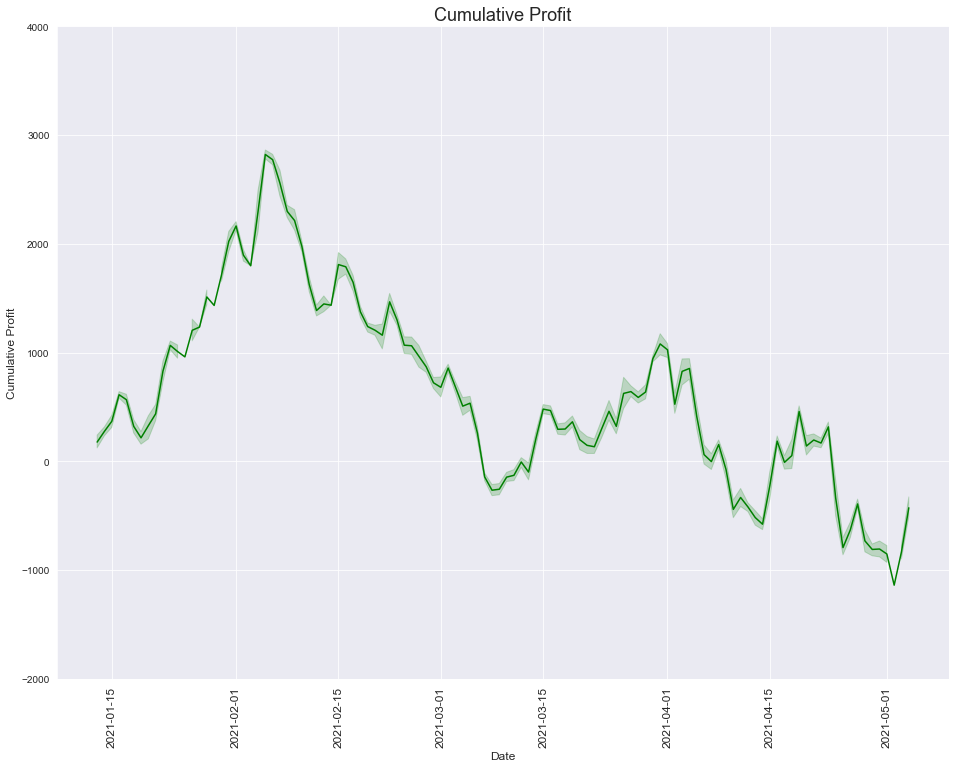

In [355]:
fig, ax = plt.subplots(figsize = (16,12))

ax = sns.lineplot(x = df['date'], y = df['Profit_Strat1_cumsum'], color = 'green')
ax.set_title('Cumulative Profit', fontsize = 18)
ax.set_ylabel('Cumulative Profit', fontsize =12, )
ax.set_xlabel('Date', fontsize =12)
plt.xticks(rotation='vertical', fontsize = 12)
# ax.axhline(325, linestyle = 'dashed', label = 'Initial Bankroll: $325', color = 'black')
ax.set_ylim(-2000,4000)



plt.show()

Strategy 2, bet to win 100$ on every bettable game, was profitbale

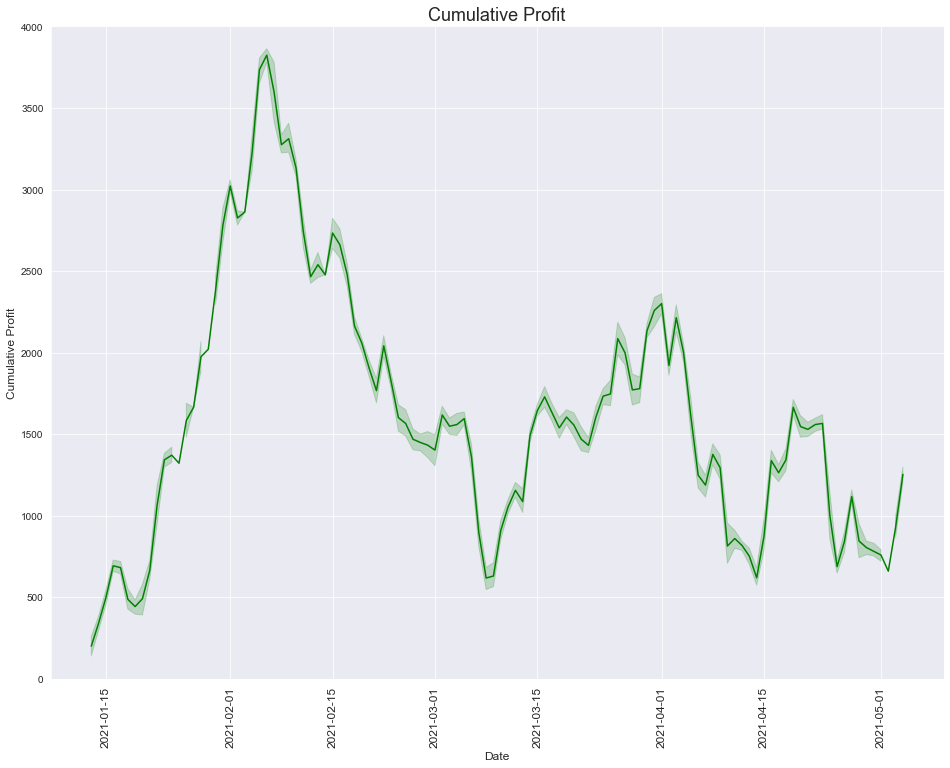

In [348]:
fig, ax = plt.subplots(figsize = (16,12))

ax = sns.lineplot(x = df['date'], y = df['Profit_Strat2_cumsum'], color = 'green')
ax.set_title('Cumulative Profit', fontsize = 18)
ax.set_ylabel('Cumulative Profit', fontsize =12, )
ax.set_xlabel('Date', fontsize =12)
plt.xticks(rotation='vertical', fontsize = 12)
# ax.axhline(325, linestyle = 'dashed', label = 'Initial Bankroll: $325', color = 'black')
ax.set_ylim(0,4000)



plt.show()

In [347]:
strat2 = pd.DataFrame(df.groupby('date').agg({'Profit_Strat2': 'sum'})).reset_index()

strat2['Cumulative Profit'] = strat2['Profit_Strat2'].cumsum()

strat2['date'] = pd.to_datetime(strat2['date'])

In [349]:
strat2.head()

,date,Profit_Strat2,Cumulative Profit
0,2021-01-13,300.000000,300.000000
1,2021-01-14,20.500000,320.500000
2,2021-01-15,175.357143,495.857143
3,2021-01-16,223.664122,719.521265
4,2021-01-17,-75.757576,643.763689


No handles with labels found to put in legend.


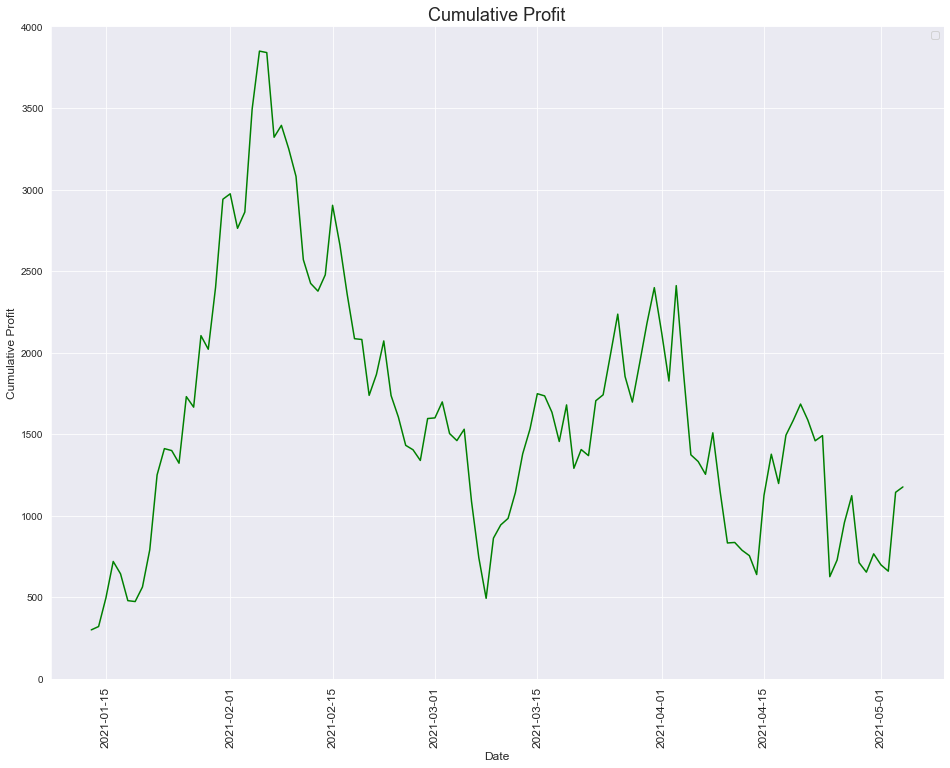

In [350]:
fig, ax = plt.subplots(figsize = (16,12))

ax = sns.lineplot(x = strat2['date'], y = strat2['Cumulative Profit'], color = 'green')
ax.set_title('Cumulative Profit', fontsize = 18)
ax.set_ylabel('Cumulative Profit', fontsize =12, )
ax.set_xlabel('Date', fontsize =12)
plt.xticks(rotation='vertical', fontsize = 12)
# ax.axhline(325, linestyle = 'dashed', label = 'Initial Bankroll: $325', color = 'black')
ax.set_ylim(0,4000)



plt.show()

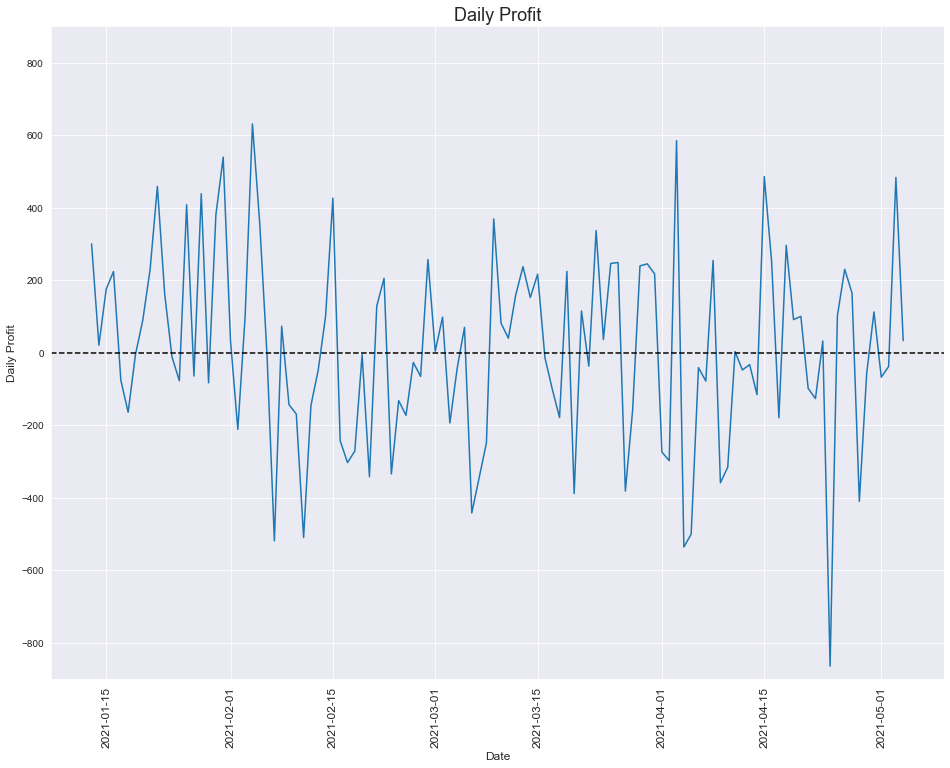

In [351]:
fig, ax = plt.subplots(figsize = (16,12))

ax = sns.lineplot(x = strat2['date'], y = strat2['Profit_Strat2'], palette = 'Blues')
ax.set_title('Daily Profit', fontsize = 18)
ax.set_ylabel('Daily Profit', fontsize =12, )
ax.set_xlabel('Date', fontsize =12)
plt.xticks(rotation='vertical', fontsize = 12)
ax.axhline(0, color = 'black', linestyle = 'dashed')
ax.set_ylim(-900,900)
plt.show()